In [6]:
import numpy as np
import sklearn
from IPython import get_ipython
import import_ipynb
get_ipython().run_line_magic('run','03_LASSO_Regression.ipynb')

Data shape: (150, 4)

Labels shape: (150,)

Coefficients: array([ 0.        , -0.        ,  0.40811896,  0.        ])

Intercept: -0.5337110569441172

R2: 0.895821120274704



# A. Classification
Thus far we've learned about several linear regression models and implemented them with scikit-learn. The logistic regression model, despite its name, is actually a linear model for classification. It is called logistic regression because it performs regression on logits, which then allows us to classify the data based on model probability predictions.

For a more detailed explanation of logistic regression, check out the Intro to Deep Learning section of this course, which implements logistic regression via a single layer perceptron model in TensorFlow.

We implement logistic regression with the LogisticRegression object (part of the linear_model module). The default setting for LogisticRegression is binary classification, i.e. classifying data observations that are labeled with either a 0 or 1.

In [7]:
# predefined dataset
# *************** But the dataset in the actual program is of shape(569,4) and we have include here another dataset of shape(150,4)
# so it wouldn't work perfectly ************************
# ******************** also in the actual dataset label the label array is only contains 0 and 1 but here it contains 0, 1 and 2
print('Data shape: {}\n'.format(data.shape))
# Binary labels
print('Labels:\n{}\n'.format(repr(labels)))

from sklearn import linear_model
reg = linear_model.LogisticRegression()
reg.fit(data, labels)

new_data = np.array([
  [  0.3,  0.5, -1.2,  1.4],
  [ -1.3,  1.8, -0.6, -8.2]])
print('Prediction classes: {}\n'.format(
  repr(reg.predict(new_data))))

Data shape: (150, 4)

Labels:
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Prediction classes: array([0, 0])



c:\python 3.10.0\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The code above created a logistic regression model from a labeled dataset. The model predicts 1 and 0, respectively, as the labels for the observations in new_data.

For multiclass classification, i.e. when there are more than two labels, we initialize the LogisticRegression object with the multi_class keyword argument. The default value is 'ovr', which signifies a One-Vs-Rest strategy. In multiclass classification, we want to use the 'multinomial' strategy.

The code below demonstrates multiclass classification. Note that to use the 'multinomial' strategy, we need to choose a proper solver (see below for details on solvers). In this case, we choose 'lbfgs'.

In [8]:
# predefined dataset
print('Data shape: {}\n'.format(data.shape))
# Multiclass labels
print('Labels:\n{}\n'.format(repr(labels)))

from sklearn import linear_model
reg = linear_model.LogisticRegression(
  solver='lbfgs',
  multi_class='multinomial', max_iter=200)
reg.fit(data, labels)

new_data = np.array([
  [ 1.8, -0.5, 6.2, 1.4],
  [ 3.3,  0.8, 0.1, 2.5]])
print('Prediction classes: {}\n'.format(
  repr(reg.predict(new_data))))

Data shape: (150, 4)

Labels:
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Prediction classes: array([2, 0])



To initialize the LogisticRegression object, we give an additional argument max_iter. If we don’t explicitly pass this argument, It uses the default value which is 100, and It may produce a ConvergenceWarning. To avoid this warning, you can try increasing its value as in this case we used max_iter=200.

# B. Solvers
The LogisticRegression object uses a solver to obtain the optimal weight settings based on the input data and labels. The five solvers and their various properties are shown in the table below (which comes from the scikit-learn official website):
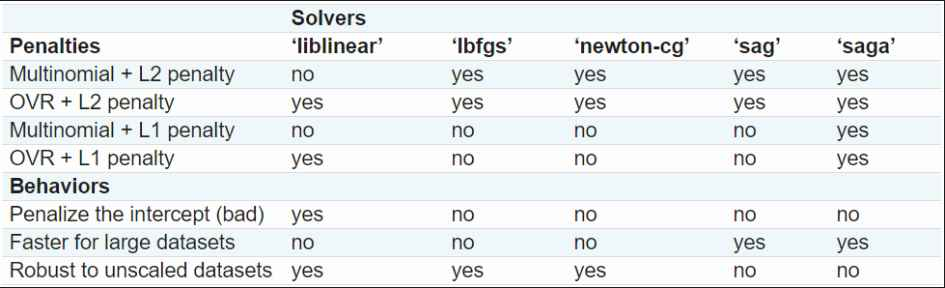
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Table of the five solvers and their properties.

By default, the logistic regression is regularized through the L2 norm of weights. We can manually specify whether to use the L1 or L2 norm with the penalty keyword argument, by setting it as either 'l1' or 'l2'.

We can choose a particular solver using the solver keyword argument. The default solver is currently 'liblinear' (although it will change to 'lbfgs' in future version). For the 'newton-cg', 'sag', and 'lbfgs' solvers, we can also set the maximum number of iterations the solver takes until the model's weights converge using the max_iter keyword argument. Since the default max_iter value is 100, we may want to let the solver run for a higher number of iterations in certain applications.

The code below demonstrates usage of the solver and max_iter keyword arguments.

In [9]:
from sklearn import linear_model
reg = linear_model.LogisticRegression(
  solver='lbfgs', max_iter=1000)

# C. Cross-validated model
Like the ridge and LASSO regression models, the logistic regression model comes with a cross-validated version in scikit-learn. The cross-validated logistic regression object, LogisticRegressionCV, is initialized and used in the same way as the regular LogisticRegression object.

The code below demonstrates usage of the LogisticRegressionCV object.

In [10]:
from sklearn import linear_model
reg = linear_model.LogisticRegressionCV(
  solver='multinomial', max_iter=1000)